In [ ]:
! pip install requests beautifulsoup4 pandas


In [ ]:
import requests
from bs4 import BeautifulSoup
import pandas as pd

# List of websites to scrape
websites = [
    'https://www.techcrunch.com',  # Example technology website
    'https://www.theverge.com/tech',  # Technology news
    'https://www.iotworldtoday.com',  # IoT news
    'https://www.wired.com/category/tech',  # Wired technology
    'https://www.engadget.com',  # Tech news
    'https://www.technologyreview.com',  # MIT Technology Review
    'https://www.greenbiz.com',  # Sustainability tech news
    'https://www.forbes.com/innovation',  # AI and IT news
    'https://www.bbc.com/news/technology',  # BBC technology news
    'https://www.cnet.com/tech/'  # CNET tech news
]

# Function to scrape data from a website
def scrape_website(url):
    try:
        response = requests.get(url)
        response.raise_for_status()  # Check if the request was successful
        soup = BeautifulSoup(response.content, 'html.parser')

        # Example: Extracting article titles, descriptions, and links
        articles = []
        for item in soup.find_all('article'):
            title = item.find('h2') or item.find('h3')  # Find title
            description = item.find('p')  # Find description
            link = item.find('a', href=True)['href'] if item.find('a', href=True) else url

            if title and description:
                articles.append({
                    'Title': title.get_text(strip=True),
                    'Description': description.get_text(strip=True),
                    'Link': link
                })
        return articles

    except Exception as e:
        print(f"Error scraping {url}: {e}")
        return []

# Scrape data from all websites
all_data = []
for site in websites:
    print(f"Scraping {site}...")
    data = scrape_website(site)
    all_data.extend(data)

# Convert scraped data to a DataFrame and save to CSV
df = pd.DataFrame(all_data)
df.to_csv('scraped_tech_news.csv', index=False)
print("Data saved to scraped_tech_news.csv")


Scraping https://www.techcrunch.com...
Scraping https://www.theverge.com/tech...
Scraping https://www.iotworldtoday.com...
Error scraping https://www.iotworldtoday.com: 403 Client Error: Forbidden for url: https://www.iotworldtoday.com/
Scraping https://www.wired.com/category/tech...
Error scraping https://www.wired.com/category/tech: 404 Client Error: Not Found for url: https://www.wired.com/category/tech
Scraping https://www.engadget.com...
Scraping https://www.technologyreview.com...
Scraping https://www.greenbiz.com...
Scraping https://www.forbes.com/innovation...
Scraping https://www.bbc.com/news/technology...
Scraping https://www.cnet.com/tech/...
Data saved to scraped_tech_news.csv


In [ ]:
! pip install textblob nltk wordcloud matplotlib


[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt.zip.


                                               Title  Sentiment  \
0  What companies are looking for when hiring ESG...      0.000   
1           Home Depot’s big plastic packaging purge      0.000   
2          When an AI companion wants something more      0.375   

  Sentiment_Label  
0         Neutral  
1         Neutral  
2        Positive  
Sentiment analysis data saved to scraped_tech_news_with_sentiment.csv


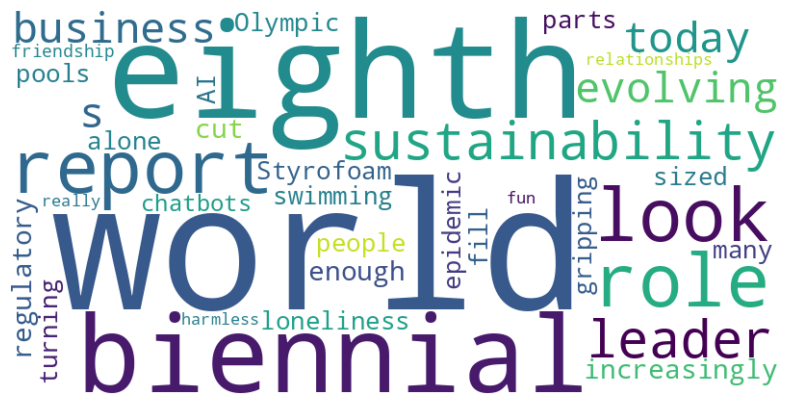

In [ ]:
import pandas as pd
from textblob import TextBlob
from wordcloud import WordCloud
import matplotlib.pyplot as plt
import nltk

# Download necessary NLTK data
nltk.download('punkt')

# Load the scraped data
df = pd.read_csv('scraped_tech_news.csv')

# Perform sentiment analysis on the descriptions
def get_sentiment(text):
    blob = TextBlob(text)
    return blob.sentiment.polarity  # Returns sentiment polarity (-1 to 1)

# Add sentiment scores to the DataFrame
df['Sentiment'] = df['Description'].apply(get_sentiment)

# Classify sentiment as Positive, Neutral, or Negative
def classify_sentiment(score):
    if score > 0:
        return 'Positive'
    elif score < 0:
        return 'Negative'
    else:
        return 'Neutral'

df['Sentiment_Label'] = df['Sentiment'].apply(classify_sentiment)

# Print the sentiment analysis summary
print(df[['Title', 'Sentiment', 'Sentiment_Label']])

# Save the updated DataFrame with sentiment data
df.to_csv('scraped_tech_news_with_sentiment.csv', index=False)
print("Sentiment analysis data saved to scraped_tech_news_with_sentiment.csv")

# Create a word cloud from the descriptions
text = ' '.join(df['Description'].dropna())  # Combine all descriptions

# Generate word cloud
wordcloud = WordCloud(width=800, height=400, background_color='white').generate(text)

# Plot the word cloud
plt.figure(figsize=(10, 5))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis('off')
plt.show()


[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.


Sentiment Summary:
count    3.000000
mean     0.125000
std      0.216506
min      0.000000
25%      0.000000
50%      0.000000
75%      0.187500
max      0.375000
Name: Sentiment, dtype: float64
Positive Articles:
                                       Title  Sentiment
2  When an AI companion wants something more      0.375
Negative Articles:
Empty DataFrame
Columns: [Title, Sentiment]
Index: []


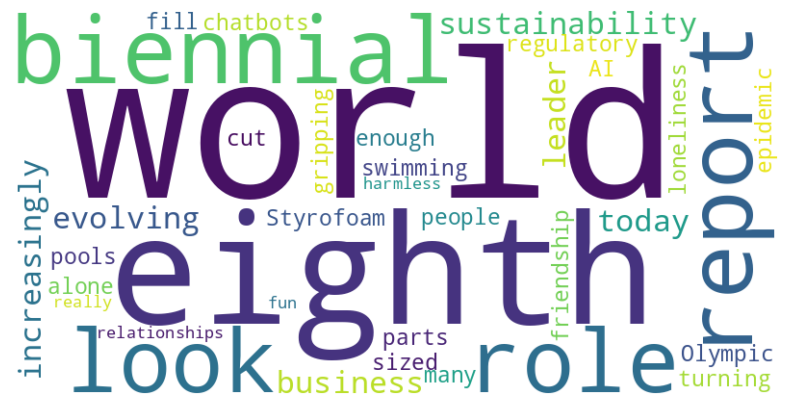

In [ ]:
from textblob import TextBlob
from wordcloud import WordCloud
import matplotlib.pyplot as plt
import pandas as pd
import nltk
from nltk.corpus import stopwords

# Download the stopwords dataset
nltk.download('stopwords')

# Load the scraped data (assuming you saved it as 'scraped_tech_news.csv')
df = pd.read_csv('scraped_tech_news.csv')

# Function to perform sentiment analysis on the descriptions
def analyze_sentiment(description):
    analysis = TextBlob(description)
    return analysis.sentiment.polarity  # Returns the sentiment score (-1 to 1)

# Add a 'Sentiment' column based on descriptions
df['Sentiment'] = df['Description'].apply(analyze_sentiment)

# Display a summary of the sentiment scores
print("Sentiment Summary:")
print(df['Sentiment'].describe())

# Filter positive, negative, and neutral sentiments
df_positive = df[df['Sentiment'] > 0]
df_negative = df[df['Sentiment'] < 0]
df_neutral = df[df['Sentiment'] == 0]

# Display some sample results
print("Positive Articles:")
print(df_positive[['Title', 'Sentiment']].head())

print("Negative Articles:")
print(df_negative[['Title', 'Sentiment']].head())

# Combine all descriptions for word cloud
text = ' '.join(description for description in df['Description'])

# Remove common stopwords
stop_words = set(stopwords.words('english'))

# Generate the word cloud
def generate_wordcloud(text, stopwords):
    wordcloud = WordCloud(stopwords=stopwords, background_color="white", width=800, height=400).generate(text)

    # Plot the word cloud
    plt.figure(figsize=(10, 5))
    plt.imshow(wordcloud, interpolation='bilinear')
    plt.axis('off')
    plt.show()

generate_wordcloud(text, stop_words)
